In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('loan_data_set.csv')

In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

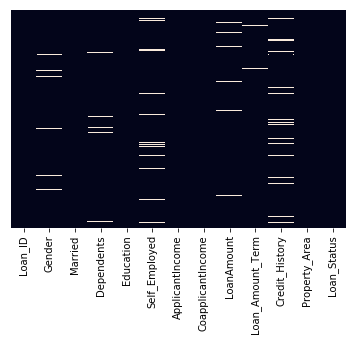

In [9]:
sb.heatmap(df.isnull(),cbar=False,yticklabels=False)

In [10]:
df.isnull().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

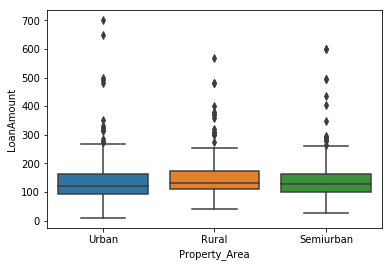

In [11]:
sb.boxplot(x='Property_Area',y='LoanAmount',data=df) # Surprisingly median doesn't change much with type of area
#so we can replace NAN with median here, as thereare lot of outliers can't use mean

In [12]:
df.LoanAmount.fillna(value=df.LoanAmount.median(),inplace=True)

In [13]:
df.Loan_Amount_Term.value_counts(normalize=True) # we can replace with mod

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [17]:
df.Loan_Amount_Term.fillna(value=360,inplace=True)

#### For rest of the categorical values also we can substitute mode, since %of NAN's is less and there is no codependency

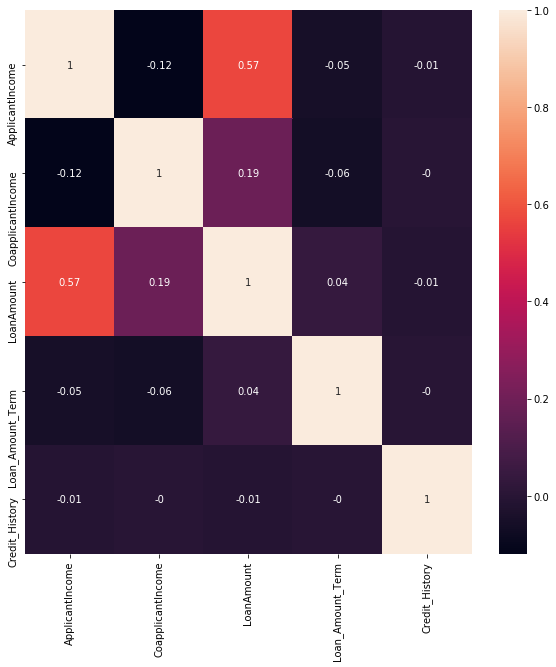

In [22]:
fig,ax = plt.subplots(figsize=(10,10))
sb.heatmap(data=df.corr().round(2),annot=True)

#### One can start with naive bayes classifier since most of the features look independent

In [26]:
df.groupby(by=['Gender','Married']).Loan_ID.count() # Most people applying for loans are Married Male, can be visualized by countplot

Gender  Married
Female  No          80
        Yes         31
Male    No         130
        Yes        357
Name: Loan_ID, dtype: int64

In [27]:
df.Education.value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

In [28]:
df.groupby(by=['Gender','Education']).Loan_ID.count()

Gender  Education   
Female  Graduate         92
        Not Graduate     20
Male    Graduate        376
        Not Graduate    113
Name: Loan_ID, dtype: int64

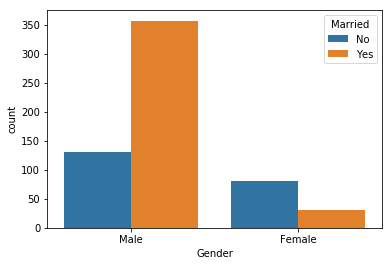

In [31]:
sb.countplot(x='Gender',hue='Married',data=df) # For Female more non maried are applying for loans which is good to see

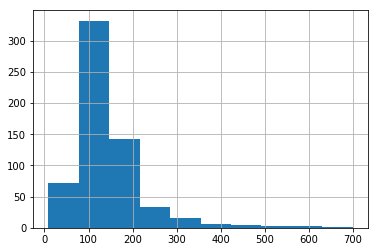

In [29]:
df.LoanAmount.hist()

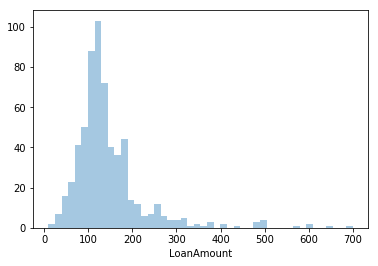

In [33]:
sb.distplot(df.LoanAmount,kde=False)